In [2]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip list

Package            Version
------------------ -------
asttokens          2.4.1
colorama           0.4.6
comm               0.2.2
contourpy          1.2.1
cycler             0.12.1
debugpy            1.8.1
decorator          5.1.1
exceptiongroup     1.2.0
executing          2.0.1
fonttools          4.51.0
importlib_metadata 7.1.0
ipykernel          6.29.3
ipython            8.24.0
jedi               0.19.1
joblib             1.4.2
jupyter_client     8.6.2
jupyter_core       5.7.2
kiwisolver         1.4.5
matplotlib         3.9.0
matplotlib-inline  0.1.7
nest_asyncio       1.6.0
numpy              1.26.4
packaging          24.0
pandas             2.2.2
parso              0.8.4
pickleshare        0.7.5
pillow             10.3.0
pip                24.0
platformdirs       4.2.2
prompt-toolkit     3.0.42
psutil             5.9.8
pure-eval          0.2.2
Pygments           2.18.0
pyparsing          3.1.2
python-dateutil    2.9.0
pytz               2024.1
pywin32            306
pyzmq          

In [7]:
import sys
assert sys.version_info >= (3,9)
import sklearn
assert sklearn.__version__ >= "0.24.0"
import numpy as np
import os

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "titanic project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [8]:
# download the data (boilerplate code)
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
TITANIC_PATH = os.path.join("datasets", "titanic")
TITANIC_URL = DOWNLOAD_ROOT + "datasets/titanic/titanic.zip"

def fetch_titanic_data(titanic_url=TITANIC_URL, titanic_path=TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    zip_path = os.path.join(titanic_path, "titanic.zip")
    urllib.request.urlretrieve(titanic_url, zip_path)
    titanic_tgz = tarfile.open(zip_path)
    titanic_tgz.extractall(path=titanic_path)
    titanic_tgz.close()
    

In [9]:
# download the data (boilerplate code)
fetch_titanic_data()

HTTPError: HTTP Error 404: Not Found

In [46]:
import pandas as pd

TITANIC_PATH = os.path.join("./")

def load_titanic_data(titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, "train.csv")
    return pd.read_csv(csv_path)

In [47]:
titanic=load_titanic_data()

In [48]:
titanic.head()  # display the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
titanic.info()  # get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

# Check Non-Null Count. 
# We can see that the Age, Cabin and Embarked attributes are sometimes null (less than 891 non-null), especially the Cabin (only 204 non-null values)
# You can (1)delete the whole attribute, (2)delete the rows with null values, or (3)set the values to some value (zero, the mean, the median, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
titanic.tail()  # display the last 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [51]:
titanic.describe()  # get a summary of the numerical attributes

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
titanic["Age"].value_counts()  # count the number of instances for each value

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<Axes: >

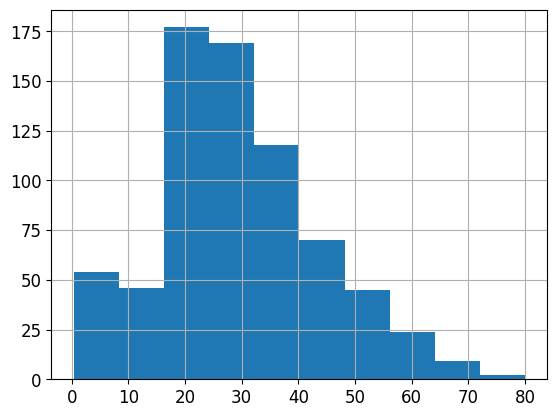

In [53]:
titanic["Age"].hist()  # create a histogram of the Age attribute

<Axes: xlabel='Age', ylabel='Fare'>

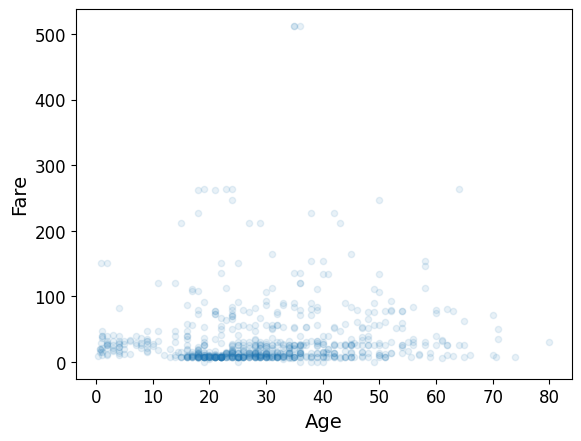

In [54]:
titanic.plot(kind="scatter", x="Age", y="Fare", alpha=0.1)  # create a scatter plot of the Age and Fare attributes

In [55]:
# check whether data loaded correctly
titanic["Survived"].value_counts() / len(titanic)

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [56]:
# You have to handle Age, Cabin and Embarked attributes because they have missing values
# You have three options: (1) delete the rows with null values, (2) delete the whole attribute, or (3) set the values to some value (zero, the mean, the median, etc.)
# (1) delete the rows with null values
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head()
sample_incomplete_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [57]:
sample_incomplete_rows.dropna(subset=["Age", "Cabin", "Embarked"], inplace=True)
# parameter
# axis: 0 for rows, 1 for columns (default is 0)
# how: 'any' if any NA values are present, 'all' if all values are NA (default is 'any')
# thresh: require that many non-NA values (default is None)
# subset: list of columns to consider (default is None)
# inplace: if True, change original DataFrame. Otherwise, return a new DataFrame (default is False)

sample_incomplete_rows
# the rows with null values have been deleted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [58]:
# (2) delete the whole attribute
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head()

sample_incomplete_rows.drop(labels=["Age", "Cabin", "Embarked"], axis=1, inplace=True)
# parameter
# labels: label or list of labels to drop
# axis: 0 for rows, 1 for columns (default is 0)
# index: you can use index names instead of labels
# columns: you can use column names instead of labels
# level: specify the level in case the axis is a MultiIndex (default is None)
# inplace: if True, change original DataFrame. Otherwise, return a new DataFrame (default is False)
# errors: if 'ignore', suppress error and only existing labels are dropped (default is 'raise')
#         if 'raise', raise error if there are no labels to drop

# using axis=0 and labels equals to use index, using axis=1 and labels equals to use columns

sample_incomplete_rows
# You can see there is no Age, Cabin and Embarked attributes anymore

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750


In [59]:
# (3) set the values to some value (zero, the mean, the median, etc.)
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head()

median=titanic["Age"].median()
sample_incomplete_rows["Age"].fillna(median, inplace=True)

print("median: ",median)
sample_incomplete_rows
# you can see the Age attribute with null values has been set to the median value(28.5)

median:  28.0


C:\Users\nbtmd\AppData\Local\Temp\ipykernel_6100\1466467094.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["Age"].fillna(median, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [61]:
# I will use thrid option to handle the missing values
# set the values to some value (zero, the mean, the median, etc.)
# I tried first option(delete the rows with null values), but it deleted so many rows

# I will set the Age attribute to the median value
median=titanic["Age"].median()
print("median: ",median)
titanic_preprocess_age=titanic.copy()
titanic_preprocess_age["Age"].fillna(median, inplace=True)

# now, you have to handle the Cabin and Embarked attributes(both are text or categorical attributes)
titanic_preprocess_age

median:  28.0


C:\Users\nbtmd\AppData\Local\Temp\ipykernel_6100\2623625238.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_preprocess_age["Age"].fillna(median, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
# handing text and categorical attributes
# handle the Cabin attribute first
titanic_cat = titanic_preprocess_age[["Cabin"]]
titanic_cat

,Cabin
692,NaN
481,NaN
527,C95
855,NaN
801,NaN
...,...
359,NaN
258,NaN
736,NaN
462,E63


In [34]:
# first option : OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()
titanic_cat_1hot=cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot

<712x128 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [35]:
cat_encoder=OneHotEncoder(sparse_output=False)
titanic_cat_1hot=cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
cat_encoder.categories_

[array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
        'A32', 'A34', 'A36', 'A5', 'A7', 'B101', 'B102', 'B18', 'B19',
        'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B39', 'B4', 'B42',
        'B49', 'B5', 'B50', 'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60',
        'B69', 'B73', 'B77', 'B78', 'B80', 'B82 B84', 'B86', 'B94',
        'B96 B98', 'C104', 'C106', 'C110', 'C118', 'C123', 'C124', 'C125',
        'C126', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C32', 'C45',
        'C46', 'C47', 'C49', 'C52', 'C54', 'C62 C64', 'C65', 'C68', 'C7',
        'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C90', 'C91', 'C92',
        'C93', 'C95', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19',
        'D20', 'D21', 'D26', 'D30', 'D33', 'D35', 'D36', 'D45', 'D47',
        'D49', 'D56', 'D6', 'D9', 'E10', 'E101', 'E12', 'E121', 'E17',
        'E24', 'E25', 'E33', 'E34', 'E36', 'E38', 'E40', 'E44', 'E46',
        'E49', 'E50', 'E58', 'E63', 'E67', 'E68', 'E77', 'E8', 'F

In [38]:
# second option : OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
titanic_cat = titanic_preprocess_age[["Cabin"]]

ordinal_encoder=OrdinalEncoder()
titanic_cat_ordinal=ordinal_encoder.fit_transform(titanic_cat)
titanic_cat_ordinal

array([[ nan],
       [ nan],
       [ 76.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [  7.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ 67.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ 81.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [111.],
       [ nan],
       [ nan],
       [ nan],
       [ 60.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ 43.],
       [ 12.],
       [ nan],
       [121.],
       [ nan],
       [ nan],
       [109.],
       [ nan],
       [ 42.],
       [ 87.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ 56.],
       [ nan],
       [ nan],
       [125.],
       [ n

In [39]:
ordinal_encoder.categories_

[array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
        'A32', 'A34', 'A36', 'A5', 'A7', 'B101', 'B102', 'B18', 'B19',
        'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B39', 'B4', 'B42',
        'B49', 'B5', 'B50', 'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60',
        'B69', 'B73', 'B77', 'B78', 'B80', 'B82 B84', 'B86', 'B94',
        'B96 B98', 'C104', 'C106', 'C110', 'C118', 'C123', 'C124', 'C125',
        'C126', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C32', 'C45',
        'C46', 'C47', 'C49', 'C52', 'C54', 'C62 C64', 'C65', 'C68', 'C7',
        'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C90', 'C91', 'C92',
        'C93', 'C95', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17', 'D19',
        'D20', 'D21', 'D26', 'D30', 'D33', 'D35', 'D36', 'D45', 'D47',
        'D49', 'D56', 'D6', 'D9', 'E10', 'E101', 'E12', 'E121', 'E17',
        'E24', 'E25', 'E33', 'E34', 'E36', 'E38', 'E40', 'E44', 'E46',
        'E49', 'E50', 'E58', 'E63', 'E67', 'E68', 'E77', 'E8', 'F

In [40]:
# there are too many categories and too many missing values for the Cabin attribute so I will delete the Cabin attribute
titanic_preprocess_cabin=titanic_preprocess_age.drop("Cabin", axis=1)
titanic_preprocess_cabin

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
692,693,3,"Lam, Mr. Ali",male,28.5,0,0,1601,56.4958,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.5,0,0,239854,0.0000,S
527,528,1,"Farthing, Mr. John",male,28.5,0,0,PC 17483,221.7792,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S
...,...,...,...,...,...,...,...,...,...,...
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,28.5,0,0,330980,7.8792,Q
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,S
462,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,S


In [41]:
# now, you have to handle the Embarked attribute
# there are only two missing values for the Embarked attribute so I will remove the rows with null values
titanic_preprocess_embarked=titanic_preprocess_cabin.dropna(subset=["Embarked"])
titanic_preprocess_embarked

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
692,693,3,"Lam, Mr. Ali",male,28.5,0,0,1601,56.4958,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.5,0,0,239854,0.0000,S
527,528,1,"Farthing, Mr. John",male,28.5,0,0,PC 17483,221.7792,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S
...,...,...,...,...,...,...,...,...,...,...
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,28.5,0,0,330980,7.8792,Q
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,S
462,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,S


In [43]:
# now, you have to handle the text and categorical attributes on the Embarked attribute
titanic_cat = titanic_preprocess_embarked[["Embarked"]]

cat_encoder=OneHotEncoder(sparse_output=False)
titanic_cat_1hot=cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [44]:
# apply one-hot encoding to the whole dataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

num_attribs=["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attrib

full_pipeline=ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

titanic_prepared=full_pipeline.fit_transform(titanic_preprocess_embarked)
titanic_prepared


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
692,693,3,"Lam, Mr. Ali",male,28.5,0,0,1601,56.4958,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.5,0,0,239854,0.0000,S
527,528,1,"Farthing, Mr. John",male,28.5,0,0,PC 17483,221.7792,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S
...,...,...,...,...,...,...,...,...,...,...
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,28.5,0,0,330980,7.8792,Q
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,S
462,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,S


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# split the dataset into a training set and a test set
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic, titanic["Survived"]): # we want to stratify by the Survived attribute
    strat_train_set = titanic.loc[train_index] 
    strat_test_set = titanic.loc[test_index]

In [ ]:
# drop the Survived attribute from the training set
titanic = strat_train_set.drop("Survived", axis=1)
titanic_labels = strat_train_set["Survived"].copy()

In [ ]:
titanic.info()
# You can see "Survived" is not in the training set anymore